# Titanic Survival Predictions (Beginner)  


### Contents:
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Choosing the Best Model
7. Creating Submission File

## Libraries

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

- %matplotlib inline 
    - notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 하는 것
    - ipython에서 제공하는 Rich output에 대한 표현방식
    - Rich output : 도표와 같은 그림, 소리, 애니메이션과 같은 결과물
    
- import warnings
  / warnings.filterwarnings('ignore'or 'default') : 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지를 무시




## 1. 데이터 통계 요약
> `df.describe()` : 다양한 통계량을 요약. 
 - 통계량은 Series에 대해 요약 수행, DataFrame의 경우 열에 대해 요약
 - 기본적으로 NaN은 제외되고 데이터 요약이 수행됨 => object.describe(percentiles=None, include=Nonc)
 - percentiles(기본값: 0.25, 0.5, 0.75)` 분위수를 출력하기 위한 데이터를 입력받음
 - include : 결과를 요약하기 위한 데이터 타입의 리스트를 입력받음

In [2]:
train = pd.read_csv("C:/Users/yiyeon/TIL/python_study/study_titanic/train.csv")
test = pd.read_csv("C:/Users/yiyeon/TIL/python_study/study_titanic/test.csv")

train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Youseff, Mr. Gerious",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 2. 데이터 분석

In [3]:
# training data 컬럼 확인
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S


#### 변수별 데이터 타입

* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin
<br><br>

* Survived: int
* Pclass: int
* Name: string
* Sex: string
* Age: float
* SibSp: int
* Parch: int
* Ticket: string
* Fare: float
* Cabin: string
* Embarked: string

In [5]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Youseff, Mr. Gerious",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Training dataset 관찰
- 총 891개 승객 데이터
- Age는 전체의 19.8%가 결측값. 나이가 생존율에 꽤 중요한 변수이기 때문에 결측값을 대체할 것임
- Cabin은 전체의 77.1%가 결측값으로, 데이터가 매우 많이 누락되어 삭제를 고려
- Embarked는 전체의 0.22%가 결측값으로 데이터 분석에서 크게 영향을 미치지 않을 것으로 예상

In [6]:
# 결측값의 개수의 합
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


> 결측값 여부 확인
 - `pd.isnull(dataset)` : bool 값 반환(결측 T, 결측이 아니면 F) <-> `notnull()`
 - `pd.isnull(train).sum()` : 칼럼별 결측값 개수 구하기
 - `pd.isnull(train).sum(1)` : 행단위 결측값 개수 구하기

### 예측
- Sex: 여성의 생존율이 높을 것
- SibSp/Parch: 혼자 여행한 사람들의 생존율이 높을 것
- Age: 어린 아이들의 생존율이 높을 것
- Pclass: 사회경제적 지위가 높은 사람들의 생존율이 더 높을 것

## 3. 시각화

### 1) Sex Feature

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


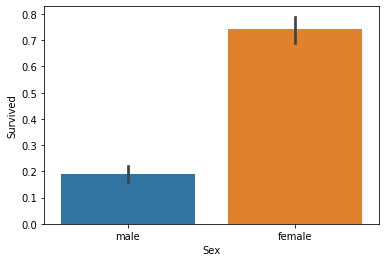

In [7]:
# 막대 그래프: 성별 생존율
sns.barplot(x="Sex", y="Survived", data=train)

# 여성
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

# 남성
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

- `pd.Series.unique()` : 유일한 값 찾기
- `pd.Series.value_counts()` : 유일한 값별 개수 세기
 - normalize = True(상대비율) / = False(개수)
 - sort= True(개수 기준 정렬) / = Fasle(유일한 값 기준 정렬)
 - ascending=True(오름차순) / =False(내림차순)
 - bins = None(유일값 기준 개수) / default Bins Group별 개수
 - dropna= True(NaN무시) / False(유일값에 NaN 포함)

- 여성은 남성보다 생존의 기회가 더 높음
- 성별은 분석에 필수적인 요소임

### 2) Pclass Feature

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


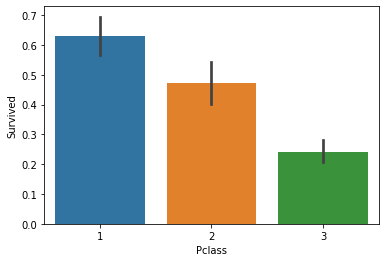

In [8]:
# Pclass별 막대그래프
sns.barplot(x="Pclass", y="Survived", data=train)

# 1등급
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

# 2등급
print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

# 3등급
print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

- Pclass 등급이 높을 수록 생존율이 높았음
    - 1등급(62.9%) > 2등급(47.3%) > 3등급(24.2%)

### 3) SibSp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


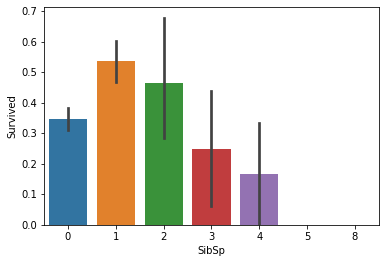

In [9]:
sns.barplot(x="SibSp", y="Survived", data=train)

# 동승객(형제자매) 없음
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

# 동승객(형제자매) 1명
print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

# 동승객(형제자매) 2명
print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

- 동승객(형제자매) 1명(53.4%) > 동승객(형제자매) 2명(46.4%) > 동승객(형제자매) 없음(34.5%)

### 4) Parch Feature

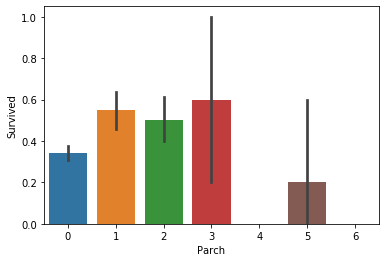

In [10]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

- 부모 혹은 자녀가 4명 미만인 승객이 생존 가능성이 더 높음.

### 5) Age Feature

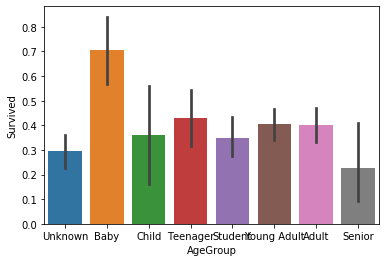

In [11]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

# age 범주화
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

- 결측값 대체 : `dic = {key:value(칼럼명:결측값 대체 방법/값)}
    - 0(0으로 대체), `df.b.mean()/median()/interpolate()(결측값 보간)`,Unkown
- `df.fillna()` : 각 칼럼별로 서로 다른 결측값 대체 전략을 사용하여 결측값 채우기
    - (inplace=True) : 결측값을 채워넣고 원본에 반영
- `pd.cut()` : 동일 길이로 나누어서 범주를 만든 후 GroupBy()로 그룹별 통계량 구하기
- `pd.qcut()` : 동일 개수로 나누기
- `pd.cut(x, bins, labels)`: 연속형 변수의 여러 구간별 범주화

- Babies가 다른 그룹보다 생존율이 높음

### 6) Cabin Feature
- 생각하기에 cabin 번호를 가진 사람들은 사회경제적 지위가 높아 생존율이 높을 것으로 사료됨

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


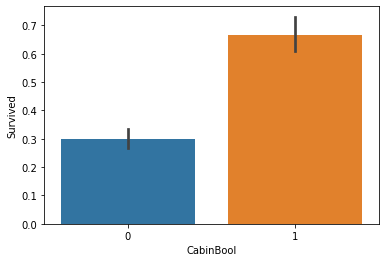

In [12]:
# 결측값이 있으면 False, 없으면 True 
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

# cabin 번호가 있는 승객
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

# cabin 번호가 없는 승객
print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

- 객실 번호가 기록된 승객은 생존 가능성이 높음(66.6% > 29.9%)

## 4. Cleaning Data 

### 1) Test Data 통계 요약

In [13]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Davies, Mr. Evan",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


#### test data 특징
- 총 418명의 승객
- 요금에서 1개의 결측값 확인
- 나이의 20.5%가 누락됨. 결측값 대체

### 2) Cabin Feature

In [14]:
# cabin 삭제
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### 3) Ticket Feature

In [15]:
# Ticket 삭제
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

### 4) Embarked Feature

In [16]:
# Embarked별 개수 확인
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


- 대부분의 사람들이 S에서 탑승한 것으로 확인됨. 따라서 결측값을 최빈값으로 대체

In [17]:
# S로 결측값 대체
train = train.fillna({"Embarked": "S"})

### 5) Age & Name Feature

In [18]:
# train, test dataset 결합
combine = [train, test]

# 각 데이터셋에서 각 이름과 타이틀을 추출
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- `data[label].str.extract(pat, flag, expand)` : 데이터 추출
    - pat : 추출할 조건을 입력
    - flag
    - expand : True(출력을 하나의 column 단위로 나타냄), False(label 단위로 출력)
- `pd.crosstab()` : df의 column별 빈도표 생성

In [19]:
# 그룹화 
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [20]:
# title을 숫자로 매핑
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [22]:
# age 결측값을 최빈값으로 채움

# 성인 남성
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() 
# 미혼 여성
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() 
# 기혼 여성
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() 
# 남아
master_age = train[train["Title"] == 4]["AgeGroup"].mode()
# royal 성인
royal_age = train[train["Title"] == 5]["AgeGroup"].mode()
# rare 성인
rare_age = train[train["Title"] == 6]["AgeGroup"].mode()

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

# 숫자로 매핑
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [23]:
# 각 연령을 숫자로 매핑
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

# 기존 age column은 삭제
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [24]:
# Name column 삭제
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### 6) Sex Feature

In [25]:
# 성별을 숫자로 매핑
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


### 7) Embarked Feature

In [26]:
# Embarked를 숫자로 매핑
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


### 8) Fare Feature

In [27]:
# Pclass의 평균 요금으로 test dataset의 결측값을 대체
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

In [28]:
# Fare 삭제
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [30]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


## 5. Best Model 선택

### 1) Training Data 분할
Training data의 22%를 사용하여 모델의 정확도를 테스트함

In [31]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

### 2) ML

* Gaussian Naive Bayes
    - 분류만 가능. 선형모델보다 빠르며, 대용량 데이터셋과 고차원 데이터에 가능. 선형 모델보다는 덜 정확함
* Logistic Regression
    - 대용량 데이터셋 가능, 고차원 데이터에 가능
* Support Vector Machines
    - 비슷한 의미의 특성으로 이루어진 중간 규모의 데이터셋에 적합. 데이터 스케일 조정이 필요. 매개변수에 민감
* Perceptron
    - 여러개의 입력에 하나의 출력을 내는 형태로 가중치와 편향을 매개변수로 함. 다층 퍼셉트론은 비선형 영역도 표현이 가능함. 퍼셉트론을 많이 생성할 수록 학습하는데 오랜시간이 걸림. 
* Decision Tree Classifier
    - 매우 빠르며, 데이터 스케일 조정이 필요 없음. 시각화하기 좋고 설명하기 쉬움
* Random Forest Classifier
    - 의사결정나무보다 훨씬 좋은 성능을 내며, 매우 안정적임. 데이터 스케일 조정이 필요없음. 고차원 희소 데이터에는 잘 안맞음
* KNN or k-Nearest Neighbors
    - 작은 데이터셋일 경우, 기본 모델로서 좋고 설명하기 쉬움
* Stochastic Gradient Descent
    - Training data가 클수록 전부 학습할 수 없기 때문에 미니 배치(mini-batch)를 이용함. 미니배치를 무작위로 선별함
* Gradient Boosting Classifier
    - 랜덤포레스트보다 성능이 조금 더 좋음. 랜덤포레스트보다 학습은 느리나 예측은 빠르고 메모리를 조금 사용함. 매개변수 튜닝이 많이 필요함

In [32]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.19


In [34]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [35]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.68


In [36]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.68


In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.71


In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

78.68


In [39]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.66


In [40]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

79.19


In [41]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.77


In [42]:
# 각 모델별 정확도 비교

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.77
0,Support Vector Machines,82.74
7,Decision Tree,80.71
2,Logistic Regression,79.19
8,Stochastic Gradient Descent,79.19
3,Random Forest,78.68
4,Naive Bayes,78.68
5,Perceptron,78.68
6,Linear SVC,78.68
1,KNN,77.66


- the Gradient Boosting Classifier model의 예측률이 84.77%로 가장 높게 나타남

## 6. 제출용 파일변환

In [43]:
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

# dataframe으로 설정 후 csv 파일로 내보냄
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)